# Summary


Derivation of Lagrangian correctly parameterized in terms of $v^x$ and $v^z$.

The derivation starts with the co-Finsler metric tensor $g_*^{ij}(\mathbf{r},\mathbf{\widetilde{p}})$, and its inverse, which gives the Finsler metric tensor $g_{ij}(\mathbf{r},\mathbf{\widetilde{p}})$, i.e., parameterized by position $\mathbf{r}$ and covector slowness $\mathbf{\widetilde{p}}$.


### Logging


In [1]:
from importlib import reload
import logging

reload(logging)
logging.basicConfig(level=logging.INFO, format=f"%(message)s")

### Preliminaries


In [2]:
import sympy as sy, numpy as np, os

sy.init_printing(pretty_print=True, wrap_line=True)
from sympy import (
    simplify,
    trigsimp,
    expand,
    factor,
    powsimp,
    Eq,
    solve,
    solveset,
    sqrt,
    diff,
    Matrix,
    det,
    tan,
    cos,
    sin,
    sec,
    csc,
    Abs,
    Rational,
    pi,
    re,
    im,
    atan,
    atan2,
    numer,
    denom,
    lambdify,
    log,
    collect,
    cancel,
    integrate,
    Integral,
    nroots,
    poly,
    N,
)

from gmplib.utils import e2d
from gme.core.symbols import *
from gme.core.equations import Equations

from gmplib.plot import GraphingBase

from scipy.linalg import norm

# Won't work for eta<1
# rdotz = symbols('v^z',  real=True, positive=True)

In [3]:
# from notebook.services.config import ConfigManager
# cm = ConfigManager().update('notebook', {'limit_output': 20000})

In [4]:
import matplotlib as mpl, matplotlib.pyplot as plt

mpl.rc("font", size=14, family="Arial")
from matplotlib.colors import BoundaryNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# from matplotlib.ticker import MaxNLocator

gr = GraphingBase()
job_name = "demo"

# Derivations


## Basics


In [5]:
# eta_ = Rational(1, 2)
eta_ = Rational(3, 2)
gmeq = Equations(eta_=eta_, mu_=eta_ / 2, beta_type="sin", do_raw=True)

gme.core.equations.Equations
gme.core.equations.EquationsMixedIn
gme.core.equations.EquationsBase
gme.core.rp.define_p_eqns
gme.core.rp.define_r_eqns
gme.core.xi.define_xi_eqns
gme.core.xi.define_xi_model_eqn
gme.core.xi.define_xi_related_eqns
gme.core.varphi.define_varphi_model_eqns
gme.core.varphi.define_varphi_related_eqns
gme.core.fundamental.define_Fstar_eqns
gme.core.fundamental.define_H_eqns
gme.core.hamiltons.define_rdot_eqns
gme.core.hamiltons.define_pdot_eqns
gme.core.hamiltons.define_Hamiltons_eqns
gme.core.ndim.nondimensionalize
gme.core.ndim.define_nodimensionalized_Hamiltons_eqns
gme.core.profile.define_z_eqns
gme.core.angles.define_tanalpha_eqns
gme.core.angles.define_tanbeta_eqns
gme.core.angles.define_psi_eqns
gme.core.metrictensor.define_g_eqns
gme.core.pxpoly.define_px_poly_eqn (ndim=False)
gme.core.pxpoly.define_px_poly_eqn (ndim=True)


In [117]:
vx = sy.symbols(r"x", real=True)
vz = sy.symbols(r"z", real=True)
s = sy.symbols(r"s", real=True)

In [7]:
varphi_ = 1

In [8]:
# y1 = symbols(r'y^1',  real=True)
# y2 = symbols(r'y^2',  real=True)
# F_eqn = Eq(F, (y1**2+y2**2)/( Rational(3,1)*sqrt(y1**2+y2**2) + y1))
# F_eqn

# F_ = (F_eqn.rhs)**2/2
# g11 = diff(diff(F_,y1),y1)
# g12 = diff(diff(F_,y1),y2)
# g21 = diff(diff(F_,y2),y1)
# g22 = diff(diff(F_,y2),y2)
# g_ = simplify(Matrix([ [g11,g12], [g21,g22] ]))
# g_.det()

The velocity vector has a column form, while the slowness covector takes a row form:


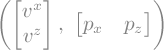

In [9]:
v_vec = Matrix([rdotx, rdotz])
p_covec = Matrix([px, pz]).T
v_vec, p_covec

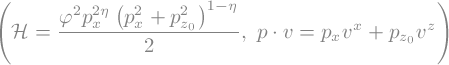

In [10]:
gmeq.H_varphi_rx_eqn

pz0 = sy.symbols("p_{z_0}", real=True, negative=False)
pdotv = sy.symbols(r"p\cdot{v}", real=True, negative=False)
gmeq.H_eqn.subs({})
pdotv_eqn = Eq(pdotv, rdotx * px + rdotz * pz0)
H_pxpz0_eqn = gmeq.H_eqn.subs({varphi_r(rvec): varphi, pz: pz0})
H_pxpz0_eqn, pdotv_eqn

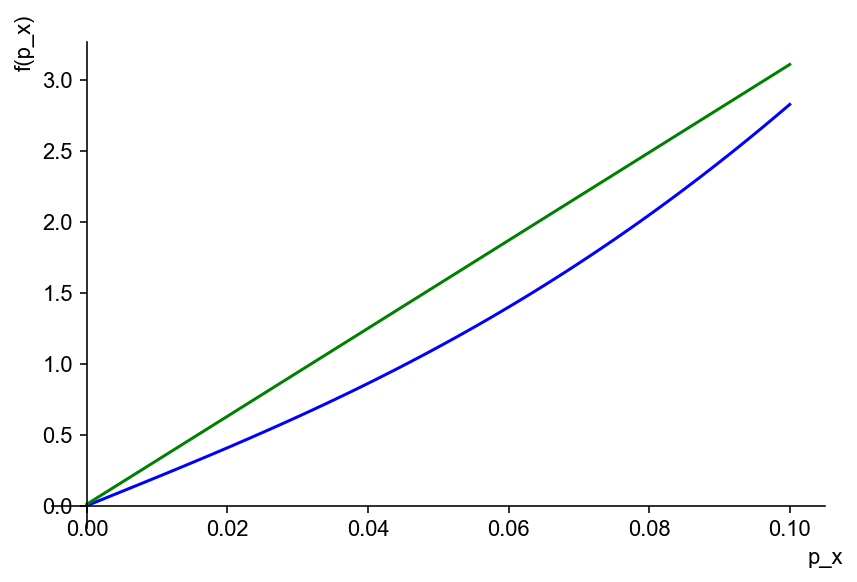

In [11]:
varphi_ = 20
pz0_ = 0.1
plot = sy.plot(
    H_pxpz0_eqn.rhs.subs({eta: Rational(1, 2), varphi: varphi_, pz0: pz0_}),
    pdotv_eqn.rhs.subs({rdotx: 31, rdotz: 0.1, pz0: pz0_}),
    (px, 0, pz0_),
    show=False,
)
plot[0].line_color = "b"
plot[1].line_color = "g"
plot.show()

## Leverage the metric tensor $g_*$


The co-Finsler metric $g_*^{ij}(\mathbf{r},\mathbf{\widetilde{p}})$ for the chosen $\eta=\tfrac{1}{2}$ or $\eta=\tfrac{3}{2}$, parameterized by position $\mathbf{r}$ and covector slowness $\mathbf{\widetilde{p}}$, aka defined on $\mathsf{T}^*\mathsf{M}$, is:


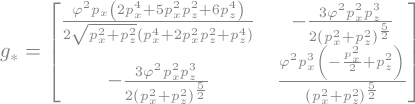

In [12]:
gstar_pxpz_eqn = simplify(
    gmeq.gstar_varphi_pxpz_eqn.subs({varphi_r(rvec): varphi})
)
gstar_pxpz_eqn

Its inverse gives the dual metric $g_{ij}(\mathbf{r},\mathbf{\widetilde{p}})$, but still parameterized by position $\mathbf{r}$ and covector slowness $\mathbf{\widetilde{p}}$,

\begin{equation}
    g_{ij} = \left( g_*^{ij} \right)^{-1}
\end{equation}


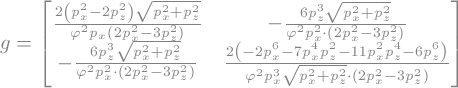

In [13]:
g_pxpz_eqn = simplify(Eq(g, gstar_pxpz_eqn.rhs.inv()))
g_pxpz_eqn

In [14]:
# simplify((g_pxpz_eqn.rhs)[1,0]*(gstar_pxpz_eqn.rhs)[1,0]+(g_pxpz_eqn.rhs)[1,1]*(gstar_pxpz_eqn.rhs)[1,1])

We can use $g_{ij}$ to lower the index of the velocity $v^j$ and map it into the slowness covector $p_i$:

\begin{equation}
    p_i = g_{ij} v^j
\end{equation}


Contracting the metric tensor to the velocity gives the slowness:


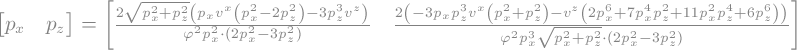

In [15]:
pcovec_eqn = Eq(p_covec, simplify(g_pxpz_eqn.rhs * v_vec).T)
# Eq(pcovec_eqn.lhs[0],pcovec_eqn.rhs[0]), Eq(pcovec_eqn.lhs[1],pcovec_eqn.rhs[1])
pcovec_eqn

Similarly, we can use $g^{ij}$ to raise the index of the slowness covector $p_i$ and map it into the velocity $v^j$:

\begin{equation}
v^i = g^{ij} p_j
\end{equation}


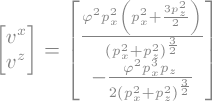

In [16]:
# gmeq.rdot_vec_eqn.subs({eta:gmeq.eta, varphi_r:varphi})
vvec_eqn = Eq(v_vec, simplify(p_covec * gstar_pxpz_eqn.rhs).T)
vvec_eqn

So we have the velocity vector $\mathbf{v}$ in terms of $\varphi(x)$ and the slowness covector $\mathbf{\widetilde{p}}$. Writing each component out:


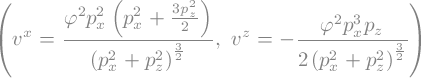

In [17]:
vx_px_pz_eqn = Eq(vvec_eqn.lhs[0], vvec_eqn.rhs[0])
vz_px_pz_eqn = Eq(vvec_eqn.lhs[1], vvec_eqn.rhs[1])
vx_px_pz_eqn, vz_px_pz_eqn

To check this result, we can solve the expressions for $\mathbf{\widetilde{p}}$ in terms of $\mathbf{v}$, which gives, e.g.,


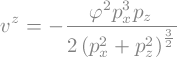

In [18]:
Eq(
    rdotz,
    solve(
        Eq(
            solve(Eq(pcovec_eqn.lhs[0], pcovec_eqn.rhs[0]), rdotx)[0],
            solve(Eq(pcovec_eqn.lhs[1], pcovec_eqn.rhs[1]), rdotx)[0],
        ),
        rdotz,
    )[0],
)

The (tangent of) the ray angle is given (by definition) by the ratio of these two components, which has the simple expression:


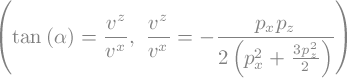

In [19]:
vzvx_ratio_eqn = Eq(
    vz_px_pz_eqn.lhs / vx_px_pz_eqn.lhs, vz_px_pz_eqn.rhs / vx_px_pz_eqn.rhs
)
Eq(tan(alpha), vzvx_ratio_eqn.lhs), vzvx_ratio_eqn

## Expressions for $p_x(v^x,v^z)$ and $p_z(v^x,v^z)$


The velocity component ratio is a simple quadratic expression in the slowness components $p_x$ and $p_z$, which makes it easy to solve for one in terms of the other (along with the velocity components $v^x$ and $v^z$):


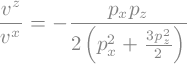

In [20]:
vzvx_ratio_eqn

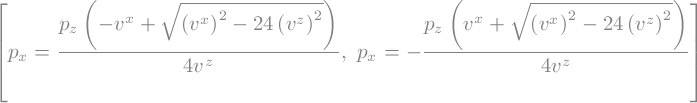

In [21]:
px_interim_solns = solve(vzvx_ratio_eqn, px)
px_interim_eqns = [
    Eq(px, px_interim_soln_) for px_interim_soln_ in px_interim_solns
    ]
px_interim_eqns

It will be useful to know the location, in both phase spaces, of a test point that lies "on-shell", i.e., on a solution of the system, which we set here. We can use this point to check the veracity of the expression for $p_x$:


In [22]:
if gmeq.eta_ < 1:
    vx_, vz_ = 0.9, -0.2978
    px_, pz_ = 0.6630963505914919, -1.354973165538337
else:
    vx_, vz_ = Rational(105, 100), Rational(21, 100)
    vx_, vz_ = 1.05462010732076, 0.214847320357639
    px_, pz_ = 1.15, -1.0
Eq(
    px,
    round(
        N(((px_interim_solns[0]).subs({rdotx: vx_, rdotz: vz_}).subs({pz: pz_}))), 5
    ),
)

And also use it to check the expressions for $v^x$ and $v^z$:


In [23]:
(
    vx_px_pz_eqn.subs({px: px_, pz: pz_, varphi_r(rvec): 1}),
    vz_px_pz_eqn.subs({px: px_, pz: pz_, varphi_r(rvec): 1}),
)


The expression for $p_x$ in terms of $p_z$ and $(v^x,v^z)$ is linear in $p_z$; using it to eliminate $p_x$ in the expression for $v^x$ gives $v^x(v^z,p_z)$:


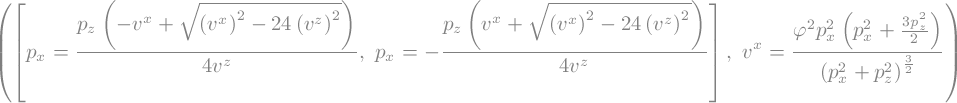

In [24]:
px_interim_eqns, vx_px_pz_eqn

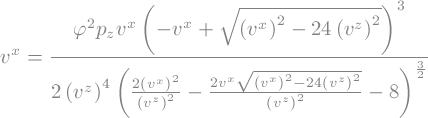

In [25]:
factor( vx_px_pz_eqn.subs(e2d(px_interim_eqns[0])) )

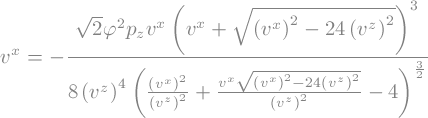

In [26]:
factor( vx_px_pz_eqn.subs(e2d(px_interim_eqns[1])) )

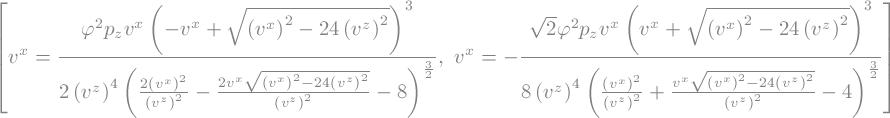

In [27]:
if eta_==Rational(1,2):
    vx_eqns = [
        (simplify(vx_px_pz_eqn.subs(e2d(px_interim_eqn_))))
        .subs({varphi_r(rvec): varphi})
        for px_interim_eqn_ in px_interim_eqns
    ]
elif eta_==Rational(3,2):
    vx_eqns = [
        (factor(vx_px_pz_eqn.subs(e2d(px_interim_eqn_))))
        .subs({varphi_r(rvec): varphi})
        for px_interim_eqn_ in px_interim_eqns
    ]
else:
    print('not implemented')
vx_eqns


Solving for $p_z$, which is just a simple rearrangement, gives $p_z(v^x,v^z)$, and $p_x(v^x,v^z)$ then follows trivially:


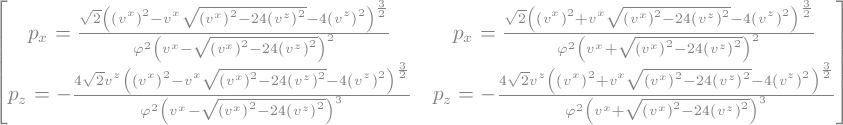

In [28]:
px_vx_vz_eqns = [None,None]
pz_vx_vz_eqns = [None,None]

for i_, (vx_eqn_, px_interim_eqn_) in enumerate(zip(vx_eqns, px_interim_eqns)):
    if gmeq.eta_ < 1:
        vz_tmp = sy.symbols(r"v^z", real=True, negative=True)
    else:
        vz_tmp = sy.symbols(r"v^z", real=True, positive=True)

    pz_vx_vz_eqns[i_] = Eq(pz, simplify(solve(vx_eqn_, pz)[0]))
    pz_vx_vz_simple_eqn = simplify(
        pz_vx_vz_eqns[i_].subs({rdotz: vz_tmp}).subs({vz_tmp: rdotz})
    )

    px_vx_vz_eqns[i_] = px_interim_eqn_.subs(e2d(pz_vx_vz_eqns[i_]))
    px_vx_vz_simple_eqn = simplify(
        px_interim_eqn_.subs(e2d(pz_vx_vz_simple_eqn))
    )

    if gmeq.eta_ > 1:
        px_vx_vz_eqns[i_] = px_vx_vz_simple_eqn
        pz_vx_vz_eqns[i_] = pz_vx_vz_simple_eqn

# (
#     simplify(px_vx_vz_simple_eqn.subs({rdotx: vx, rdotz: vz})),
#     pz_vx_vz_simple_eqn.subs({rdotx: vx, rdotz: vz}),
# )
Matrix([px_vx_vz_eqns, pz_vx_vz_eqns])

The ratio of $-p_x(v^x,v^z)/p_z(v^x,v^z)$ should give an expression $\tan\beta$ consistent with what we know from more direct derivation, which it does:


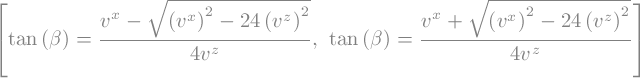

In [29]:
tanbeta_eqns = [
    simplify( Eq(tan(beta), -px_vx_vz_eqn_.rhs / pz_vx_vz_eqn_.rhs) )
    for (px_vx_vz_eqn_, pz_vx_vz_eqn_) in zip(px_vx_vz_eqns,pz_vx_vz_eqns)
]
tanbeta_eqns


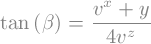

In [30]:
simplify( tanbeta_eqns[1].subs({sqrt(rdotx**2-24*rdotz**2):y}) )

Generate a test point below the critical angle $\beta_\mathrm{crit}$:


In [31]:
(
    Eq(
        pz,
        N(
            (
                (pz_vx_vz_eqns[0].rhs)
                .subs({rdotx: vx_, rdotz: vz_})
                .subs({varphi: 1, px: px_, pz: pz_})
            )
        ),
    ),
    Eq(
        px,
        N(
            (
                (px_vx_vz_eqns[0].rhs)
                .subs({rdotx: vx_, rdotz: vz_})
                .subs({varphi: 1, px: px_, pz: pz_})
            )
        ),
    ),
)


Plug this $p$ coordinate in to check the surface tilt angle is sub-critical:


In [32]:
(
    Eq(tan(beta), round(N(tanbeta_eqns[0].rhs.subs({rdotx: vx_, rdotz: vz_})), 3)),
    Eq(
        (beta),
        np.round(
            np.rad2deg(
                np.arctan(
                    float(N(tanbeta_eqns[0].rhs.subs({rdotx: vx_, rdotz: vz_})))
                )
            ),
            2,
        ),
    ),
    Eq(
        (beta_crit),
        np.round(np.rad2deg(np.arctan(float(N(gmeq.tanbeta_crit)))), 2),
    ),
)


Lambdify the expressions for $p_x(v^x,v^z)$ and $p_z(v^x,v^z)$.


In [33]:
if gmeq.eta_ < 1:
    px_vx_vz_lambda = lambda f, vx, vz: float(
        (N(px_vx_vz_eqns[0].rhs.subs({varphi: f, rdotx: vx, rdotz: vz})))
    )
    pz_vx_vz_lambda = lambda f, vx, vz: float(
        (N(pz_vx_vz_eqns[0].rhs.subs({varphi: f, rdotx: vx, rdotz: vz})))
    )
else:
    px_vx_vz_lambda = lambda f, vx, vz: float(
        re(N(px_vx_vz_eqns[0].rhs.subs({varphi: f, rdotx: vx, rdotz: vz})))
    )
    pz_vx_vz_lambda = lambda f, vx, vz: float(
        re(N(pz_vx_vz_eqns[0].rhs.subs({varphi: f, rdotx: vx, rdotz: vz})))
    )
p_vx_vz_lambda = lambda f, v: [
    px_vx_vz_lambda(f, v[0], v[1]),
    pz_vx_vz_lambda(f, v[0], v[1]),
]


## Lagrangian $L(v^x,v^z,\varphi)$ using $p(v)$ mappings and Legendre transform


Specify the Hamiltonian $H$ for the chosen value of $\eta$:


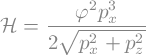

In [34]:
H_eqn = Eq(H, gmeq.H_eqn.rhs.subs({varphi_r(rvec): varphi, eta: gmeq.eta_}))
H_eqn

Assert that the Lagrangian $L$ if the Legendre transform of this Hamiltonian, remembering not to hard-wire the inner product of $\mathbf{\widetilde{p}}$ and $\mathbf{v}$ to unity:


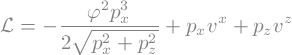

In [35]:
L_raw_eqn = simplify(Eq(L, px * rdotx + pz * rdotz - H_eqn.rhs))
L_raw_eqn

Use the mappings for $p_x(v^x,v^z)$ and $p_z(v^x,v^z)$ to reparameterize this Lagrangian into the form $L(v^x, v^z)$:


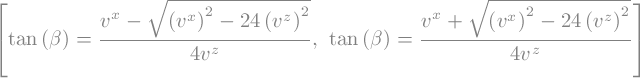

In [36]:
tanbeta_eqns

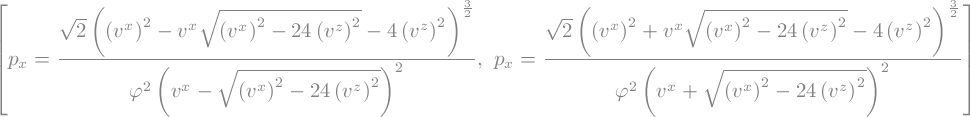

In [37]:
px_vx_vz_eqns

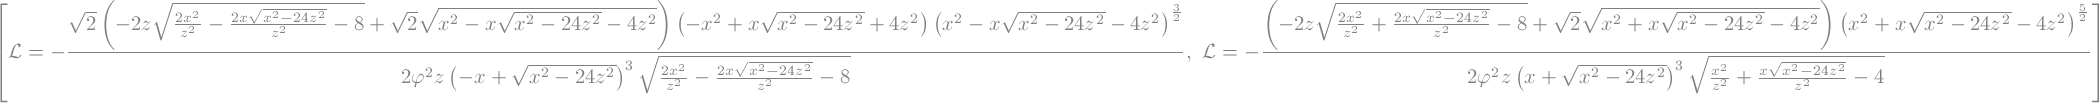

In [38]:
if gmeq.eta_ < 1:
    L_interim_eqns = [
            simplify(
            (
                (factor(L_raw_eqn.subs({px: -pz * tan(beta)})))
                .subs(e2d(tanbeta_eqn_))
                .subs(e2d(px_vx_vz_eqn_))
            ).subs(e2d(pz_vx_vz_eqn_))
        )  # .subs({rdotz:-Abs(rdotz)})
        for (tanbeta_eqn_, px_vx_vz_eqn_, pz_vx_vz_eqn_)
        in zip(tanbeta_eqns, px_vx_vz_eqns, pz_vx_vz_eqns)
    ]
else:
    L_interim_eqns = [
        simplify(
            (
                (factor(L_raw_eqn.subs({px: -pz * tan(beta)})))
                .subs(e2d(tanbeta_eqn_))
                .subs(e2d(px_vx_vz_eqn_))
            ).subs(e2d(pz_vx_vz_eqn_))
        ) #.subs({rdotz: Abs(rdotz)})
        for (tanbeta_eqn_, px_vx_vz_eqn_, pz_vx_vz_eqn_)
        in zip(tanbeta_eqns, px_vx_vz_eqns, pz_vx_vz_eqns)
    ]
L_interim_eqns = [factor(simplify( L_interim_eqn_ )) for L_interim_eqn_ in L_interim_eqns]
[L_interim_eqn_.subs({rdotx: vx, rdotz: vz}) for L_interim_eqn_ in L_interim_eqns]

In [151]:
vx_, vz_

In [145]:
(sqrt(rdotx**2/rdotz**2 - s*rdotx*sqrt(rdotx**2 - 24*rdotz**2)/rdotz**2 - 4)).subs({rdotx: vx, rdotz: vz}).subs({vx:vx_, vz:vz_, s:1}).n()

In [148]:
(sqrt(rdotx ** 2 - s*rdotx * sqrt(rdotx ** 2 - 24 * rdotz ** 2) - 4 * rdotz ** 2)/(rdotz)).subs({rdotx: vx, rdotz: vz}).subs({vx:vx_, vz:vz_, s:1}).n()

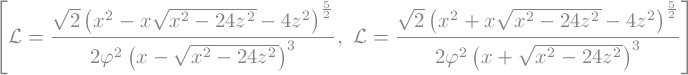

In [149]:
if eta_==Rational(3,2):
    L_compact_eqns = [
        simplify(L_interim_eqn_)
        .subs({
            sqrt(rdotx**2/rdotz**2 - s_*rdotx*sqrt(rdotx**2 - 24*rdotz**2)/rdotz**2 - 4) :
            sqrt(rdotx**2 - s_*rdotx * sqrt(rdotx**2 - 24*rdotz**2) - 4 * rdotz**2)/(rdotz)
        })
        for L_interim_eqn_, s_ in zip(L_interim_eqns, (+1,-1))
    ]
elif eta_==Rational(1,2):
    L_compact_eqns = [
        simplify(L_interim_eqn_.subs({
            sqrt(rdotx**2/rdotz**2 - s_*rdotx*sqrt(rdotx**2 - 8*rdotz**2)/rdotz**2 + 4) :
            sqrt(rdotx ** 2 - s_*rdotx * sqrt(rdotx ** 2 - 8 * rdotz ** 2) + 4 * rdotz ** 2)/(-rdotz)
        }))
        for L_interim_eqn_, s_ in zip(L_interim_eqns, (+1,-1))
    ]
else:
    print("Not implemented")
[L_compact_eqn_.subs({rdotx: vx, rdotz: vz}) for L_compact_eqn_ in L_compact_eqns]

In [150]:
[
    round((L_compact_eqn_.rhs).subs({varphi: 1, rdotx: vx_, rdotz: vz_}).n(), 2)
    for L_compact_eqn_ in L_compact_eqns
]

In [121]:
[
    round((L_interim_eqn_.rhs).subs({varphi: 1, rdotx: vx_, rdotz: vz_}).n(), 2)
    for L_interim_eqn_ in L_interim_eqns
]


In [43]:
varphi_

In [44]:
px_, pz_, vx_, vz_

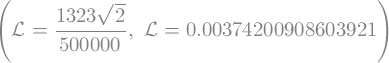

In [45]:
L_eqn_ = L_compact_eqns[0].subs(
    {
        rdotx: (Rational(9, 10) if gmeq.eta_ < 1 else Rational(105, 100)),
        rdotz: (Rational(3, 10) if gmeq.eta_ < 1 else Rational(21, 100)),
        varphi: varphi_,
    }
)
L_eqn_, N(L_eqn_)

Lambdify the uncompact and compact forms we have for the Lagrangian.


In [46]:
L_raw_lambda = lambda f_, px_, pz_, vx_, vz_: float(
    (
        N(
            L_raw_eqn.rhs.subs(
                {varphi: f_, px: px_, pz: pz_, rdotx: vx_, rdotz: vz_}
            )
        )
    )
)
L_lambda = lambda f_, vx_, vz_: float(
    (N(L_compact_eqns[0].rhs.subs({varphi: f_, rdotx: vx_, rdotz: vz_})))
)

# Tests


## Rederivation of metric tensor $g$ from $L$


In [64]:
sub_ = {rdotx: vx_, rdotz: vz_, px: px_, pz: pz_, varphi: varphi_}
sub_

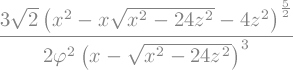

In [65]:
L_ = L_compact_eqn_.rhs
L_.subs({rdotx: vx, rdotz: vz})

Differentiate $L = \tfrac{1}{2}F^2$ with respect to velocity $v$, remembering that $\varphi(x)$ is a function of horizontal position $x$ only, and is not dependent on $v$.


In [66]:
dLdv = Matrix([diff(L_, rdotx), diff(L_, rdotz)])
d2Ldvxdvx = diff(dLdv[0], rdotx)
d2Ldvxdvz = diff(dLdv[0], rdotz)
d2Ldvzdvx = diff(dLdv[1], rdotx)
d2Ldvzdvz = diff(dLdv[1], rdotz)
d2Ldv2 = Matrix([[d2Ldvxdvx, d2Ldvxdvz], [d2Ldvzdvx, d2Ldvzdvz]])
g_from_L_eqn = simplify(Eq(g, d2Ldv2))


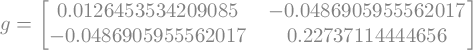

In [67]:
g_p_ = g_pxpz_eqn.subs(sub_)
g_p_

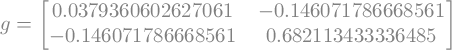

In [68]:
g_v_ = Eq(g, N(g_from_L_eqn.rhs.subs(sub_)))
g_v_

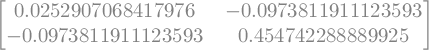

In [69]:
g_v_.rhs - g_p_.rhs

In [70]:
px_alt_, pz_alt_ = 0.7, -1
vx_alt_ = vx_px_pz_eqn.rhs.subs({px: px_alt_, pz: pz_alt_, varphi: varphi_})
vz_alt_ = vz_px_pz_eqn.rhs.subs({px: px_alt_, pz: pz_alt_, varphi: varphi_})
vx_alt_, vz_alt_
sub_alt_ = {
    rdotx: vx_alt_,
    rdotz: vz_alt_,
    px: px_alt_,
    pz: pz_alt_,
    varphi: varphi_,
}
sub_alt_

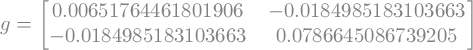

In [71]:
g_p_ = g_pxpz_eqn.subs(sub_alt_)
g_p_

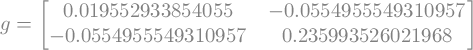

In [72]:
g_v_ = Eq(g, N(g_from_L_eqn.rhs.subs(sub_alt_)))
g_v_


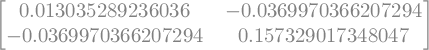

In [73]:
g_v_.rhs - g_p_.rhs

## Local tests


In [74]:
round(
    N(px_vx_vz_eqn_.rhs.subs({rdotx: vx_, rdotz: vz_, varphi: varphi_})), 3
), round(N(pz_vx_vz_eqn_.rhs.subs({rdotx: vx_, rdotz: vz_, varphi: varphi_})), 3)

In [75]:
px_ = N(px_vx_vz_eqn_.rhs.subs({rdotx: vx_, rdotz: vz_}).subs({varphi: varphi_}))
pz_ = N(pz_vx_vz_eqn_.rhs.subs({rdotx: vx_, rdotz: vz_}).subs({varphi: varphi_}))
px_, pz_

In [76]:
px_ = px_vx_vz_lambda(varphi_, vx_, vz_)
pz_ = pz_vx_vz_lambda(varphi_, vx_, vz_)
px_, pz_

In [77]:
Matrix([px_, pz_]).dot(Matrix([vx_, vz_]))

In [78]:
sub_ = {rdotx: vx_, rdotz: vz_, varphi: varphi_, px: px_, pz: pz_}

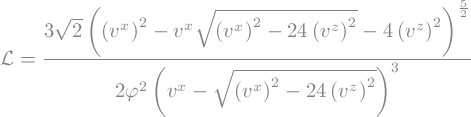

In [79]:
L_compact_eqn_

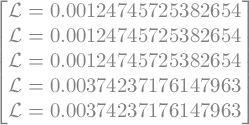

In [80]:
Matrix(
    [
        N(L_raw_eqn.subs(sub_)),
        Eq(L, L_raw_lambda(varphi_, px_, pz_, vx_, vz_)),
        N(L_interim_eqn_.subs(sub_)),
        N(L_compact_eqn_.subs(sub_)),
        Eq(L, L_lambda(varphi_, vx_, vz_)),
    ]
)

## Indicatrix/figuratrix tests


In [81]:
if gmeq.eta_ < 1:
    varphi_plot_ = 1
else:
    varphi_plot_ = 1

In [82]:
sub_plot_ = {varphi_r(rvec): varphi_plot_, eta: gmeq.eta_}

In [83]:
H_lambdified = lambdify([varphi, px, pz], H_eqn.rhs)
H_lambda = lambda f_, px_, pz_: float(N(H_lambdified(f_, px_, pz_)))

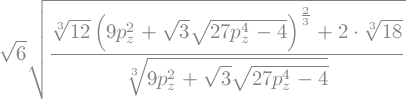

In [84]:
H_parametric_eqn = Eq((2 * gmeq.H_eqn.rhs) ** 2, 1).subs(sub_plot_)
px_H_solns = [simplify(sqrt(soln)) for soln in solve(H_parametric_eqn, px ** 2)]
pz_H_solns = [
    simplify(sqrt(soln)).subs({Abs(px): px})
    for soln in solve(H_parametric_eqn, pz ** 2)
]
px_H_soln_ = [
    soln for soln in px_H_solns if Abs(sy.im(N(soln.subs({pz: 1})))) < 1e-10
][0]
px_H_lambda = lambdify([pz], simplify(px_H_soln_))
numer(simplify(px_H_soln_))

In [85]:
pz_min_eqn = Eq(pz_min, 0)
px_min_eqn = Eq(
    px_min,
    sqrt(
        solve(
            Eq(
                (
                    solve(
                        Eq(4 * gmeq.H_eqn.rhs ** 2, 1).subs(sub_plot_), pz ** 2
                    )[:]
                )[0],
                0,
            ),
            px ** 2,
        )[1]
    ),
)
tanbeta_max_eqn = Eq(tan(beta_max), sy.oo)
tanbeta_max = None
px_min_ = round(float(N(px_min_eqn.rhs.subs(sub_plot_))), 4)
pz_min_ = round(float(N(pz_min_eqn.rhs.subs(sub_plot_))), 8)
px_min_, -pz_min_, np.rad2deg(
    np.arctan(px_min_ / pz_min_)
) if pz_min_ > 0 else None

(0.0, -0.0, None)

In [86]:
v_from_gstar_lambda_tmp = lambdify(
    (px, pz),
    N(gmeq.gstar_varphi_pxpz_eqn.subs(sub_plot_).rhs * Matrix([px, pz])),
)
v_from_gstar_lambda = lambda px_, pz_: (
    v_from_gstar_lambda_tmp(px_, pz_)
).flatten()
v_lambda = lambda pa: np.array(
    [(v_from_gstar_lambda(px_, pz_)) for px_, pz_ in pa]
)
# gmeq.gstar_varphi_pxpz_eqn


In [87]:
if gmeq.eta_ == Rational(3, 2):
    pz_max_ = 100
else:
    pz_max_ = 50
pz_array = -(
    10
    ** np.linspace(
        np.log10(pz_min_ if pz_min_ > 0 else 1e-1), np.log10(pz_max_), 50
    )
)
px_array = px_H_lambda(pz_array)
p_array = np.vstack([px_array, pz_array]).T
p_array = p_array[np.isfinite(p_array[:, 0]) & np.isfinite(p_array[:, 1])]

modp_array = norm(p_array, axis=0)
tanbeta_crit = float(N(gmeq.tanbeta_crit_eqn.rhs.subs({eta: gmeq.eta_})))

p_infc_array = p_array[np.abs(p_array[:, 0] / p_array[:, 1]) < tanbeta_crit]
p_supc_array = p_array[np.abs(p_array[:, 0] / p_array[:, 1]) >= tanbeta_crit]

v_infc_array = v_lambda(p_infc_array)
v_supc_array = v_lambda(p_supc_array)
v_array = v_lambda(p_array)
# v_array

In [88]:
p_from_v_array = np.array(
    [p_vx_vz_lambda(varphi_plot_, v_) for v_ in v_array[::1]]
)
len(p_from_v_array), len(p_array)

In [89]:
p_from_v_trunc_raw_array = p_from_v_array[
    np.isfinite((p_from_v_array[:, 0])) & np.isfinite((p_from_v_array[:, 1]))
]
v_from_v_trunc_raw_array = v_array[
    np.isfinite((p_from_v_array[:, 0])) & np.isfinite((p_from_v_array[:, 1]))
]
len(p_from_v_trunc_raw_array), len(v_from_v_trunc_raw_array)

In [90]:
p_trunc1_array = p_from_v_trunc_raw_array[1:]
p_trunc0_array = p_from_v_trunc_raw_array[:-1]
p_trunc1_array - p_trunc0_array
p_from_v_trunc_array = p_trunc0_array[
    (p_trunc1_array[:, 1] - p_trunc0_array[:, 1]) < 0
]
v_trunc0_array = v_from_v_trunc_raw_array[:-1]
v_from_v_trunc_array = v_trunc0_array[
    (p_trunc1_array[:, 1] - p_trunc0_array[:, 1]) < 0
]

In [91]:
p_from_v_infc_array = p_from_v_trunc_array[
    np.abs(p_from_v_trunc_array[:, 0] / p_from_v_trunc_array[:, 1])
    < tanbeta_crit
]
p_from_v_supc_array = p_from_v_trunc_array[
    np.abs(p_from_v_trunc_array[:, 0] / p_from_v_trunc_array[:, 1])
    >= tanbeta_crit
]

In [92]:
[
    np.round(np.dot(p_, v_), 3)
    for p_, v_ in (zip(p_from_v_infc_array, v_infc_array))
]

In [93]:
[np.round(np.dot(p_, v_), 3) for p_, v_ in (zip(p_infc_array, v_infc_array))]

In [94]:
[
    round(p_[0] * v_[0] + p_[1] * v_[1], 3)
    for p_, v_ in (zip(p_infc_array, v_infc_array))
]

In [95]:
[
    np.round(H_lambda(varphi_plot_, px_, pz_), 4)
    for px_, pz_ in p_from_v_infc_array
]

In [96]:
[np.round(H_lambda(varphi_plot_, px_, pz_), 4) for px_, pz_ in p_infc_array]

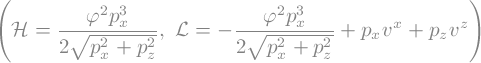

In [97]:
H_eqn, L_raw_eqn

In [98]:
[
    round(H_eqn.rhs.subs({varphi: varphi_plot_, px: px_, pz: pz_}), 2)
    for [px_, pz_], [vx_, vz] in zip(p_infc_array, v_infc_array)
]

In [99]:
[
    round(
        (px * rdotx + pz * rdotz).subs(
            {px: p_[0], pz: p_[1], rdotx: v_[0], rdotz: v_[1]}
        ),
        3,
    )
    for (p_, v_) in zip(p_infc_array, v_infc_array)
]

In [100]:
[
    np.round(L_raw_lambda(varphi_plot_, *p_, *v_), 4)
    for (p_, v_) in zip(p_infc_array, v_infc_array)
]

In [101]:
# [np.round(L_lambda(varphi_, *v_),4) for v_ in v_infc_array]

# Plot


gmplib.plot.GraphingBase:
   Creating plot: demo_Fstar_F_rectlinear size=(7, 7) @ 100 dpi


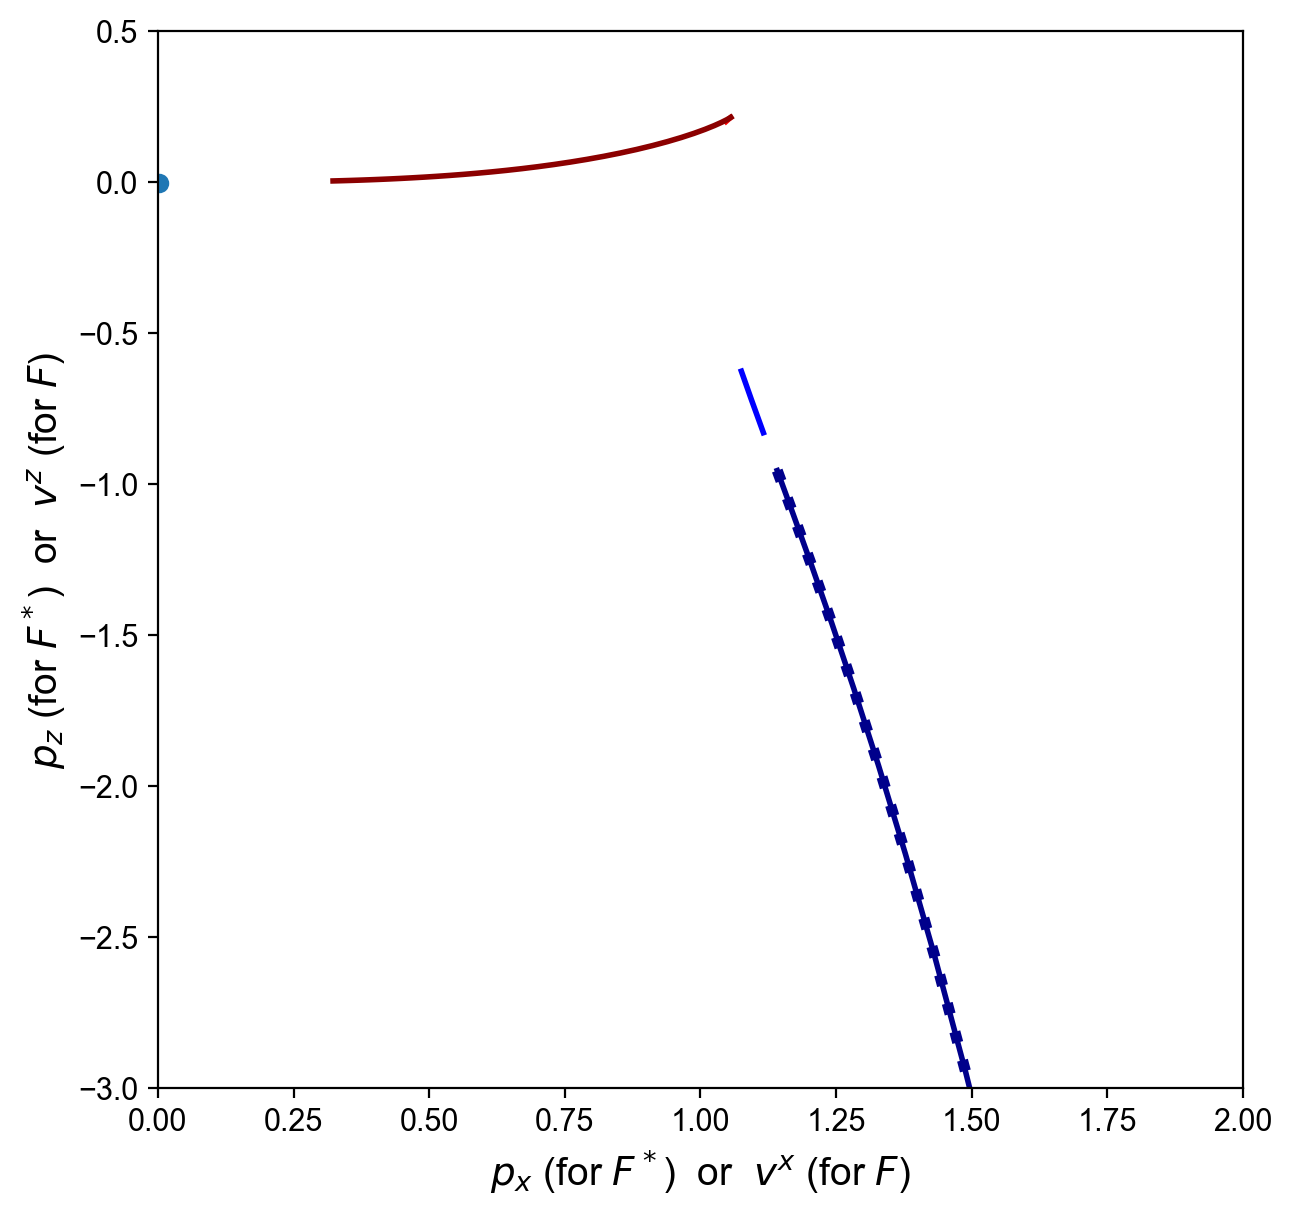

In [102]:
fig = gr.create_figure(job_name + "_Fstar_F_rectlinear", fig_size=(7, 7))
plt.plot(
    p_supc_array[:, 0],
    p_supc_array[:, 1],
    "Blue",
    lw=2,
    ls="-",
    label=r"$F^*\!\!=1$,  $\beta\geq\beta_\mathrm{c}$",
)
plt.plot(
    p_infc_array[:, 0],
    p_infc_array[:, 1],
    "DarkBlue",
    lw=2,
    ls="-",
    label=r"$F^*\!\!=1$,  $\beta<\beta_\mathrm{c}$",
)

plt.plot(
    p_from_v_supc_array[:, 0],
    p_from_v_supc_array[:, 1],
    "Blue",
    lw=4,
    ls="-",
    label=r"$F^*\!\!=1$,  $\beta\geq\beta_\mathrm{c}$",
)
plt.plot(
    p_from_v_infc_array[:, 0],
    p_from_v_infc_array[:, 1],
    "DarkBlue",
    lw=4,
    ls=":",
    label=r"$F^*\!\!=1$,  $\beta<\beta_\mathrm{c}$",
)

plt.plot(
    v_supc_array[:, 0],
    v_supc_array[:, 1],
    "Red",
    lw=2,
    ls="-",
    label=r"$F=1$,  $\beta\geq\beta_\mathrm{c}$",
)
# plt.plot([0,vx_abcrit_],[0,vz_abcrit_],
#          '-.', color='DarkRed', lw=1, label=r'$\alpha_{\mathrm{c}}$')
plt.plot(
    v_infc_array[:, 0],
    v_infc_array[:, 1],
    "DarkRed",
    lw=2,
    ls="-",
    label=r"$F=1$,  $\beta<\beta_\mathrm{c}$",
)
plt.xlabel(r"$p_x$ (for $F^*$)  or  $v^x$ (for $F$)", fontsize=14)
plt.ylabel(r"$p_z$ (for $F^*$)  or  $v^z$ (for $F$)", fontsize=14)
plt.xlim(0, 2)
plt.ylim(-3, 0.5)
plt.plot(px_, pz_, "o")
px_, pz_